In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from pandas import DataFrame

In [26]:
df = pd.read_csv('M3_152_0.csv', index_col=0, header=None)
df

,1
0,
0,5717.0
1,6374.0
2,5837.5
3,7318.4
4,4613.0
5,4611.4
6,5623.6
7,6058.7
8,6449.9


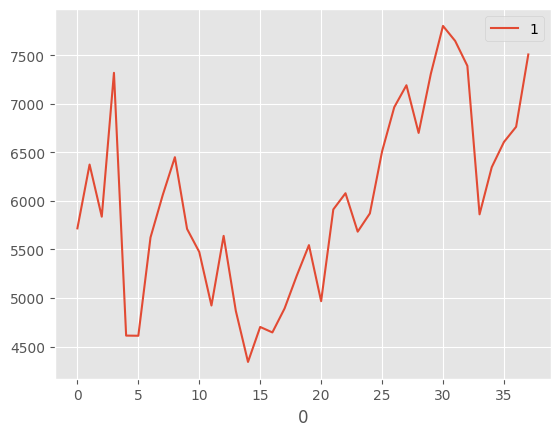

In [27]:
df.plot()
plt.show()

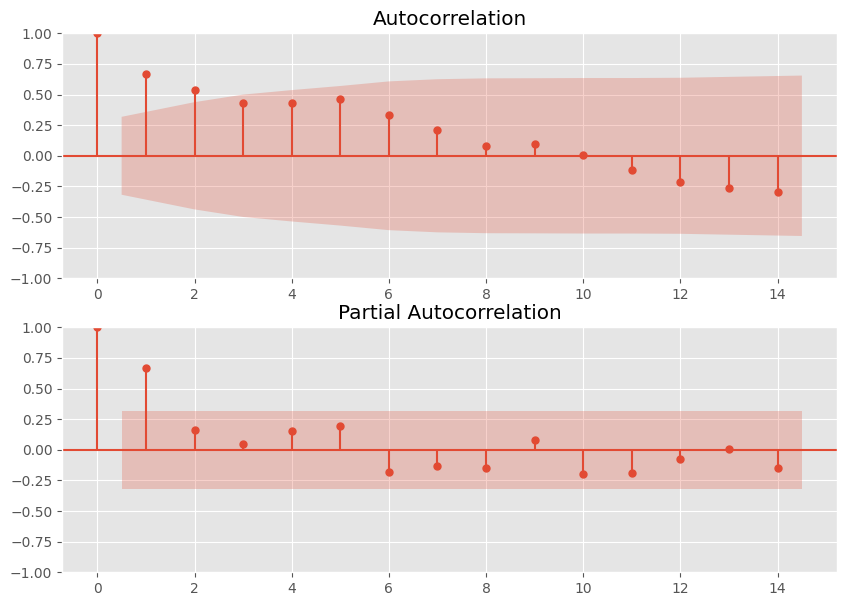

In [28]:
plt.figure(figsize=(10,7))
plt.subplot(211)
plot_acf(df, lags=14, ax=plt.gca())
plt.subplot(212)

plot_pacf(df, method='ywmle', lags=14, ax=plt.gca())
plt.show()

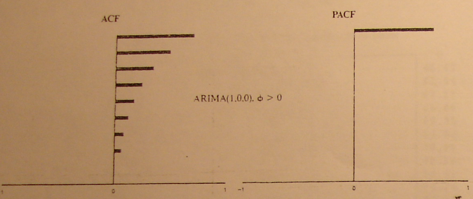

In [29]:
model = ARIMA(df, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      1   No. Observations:                   38
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -302.554
Date:                Sun, 19 May 2024   AIC                            611.107
Time:                        20:12:42   BIC                            616.020
Sample:                             0   HQIC                           612.855
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6059.2092    417.612     14.509      0.000    5240.705    6877.713
ar.L1          0.6988      0.149      4.692      0.000       0.407       0.991
sigma2      4.737e+05   1.09e+05      4.352      0.0

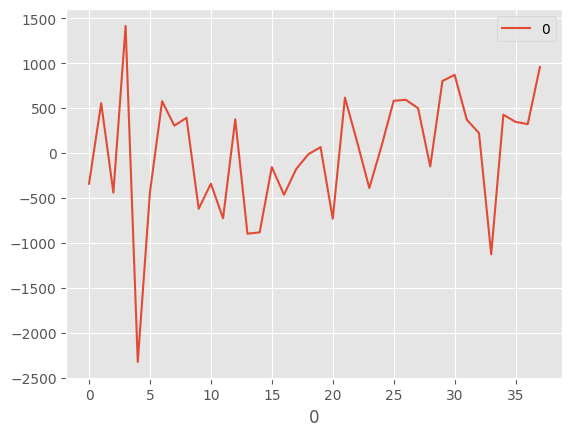

In [30]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot()
plt.show()

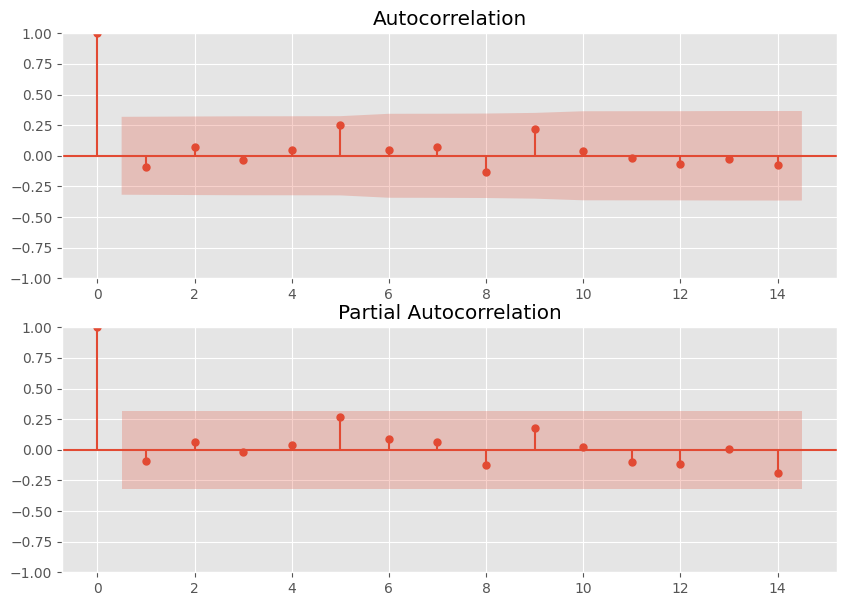

In [31]:
plt.figure(figsize=(10,7))
plt.subplot(211)
plot_acf(residuals, lags=14, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals, method='ywmle', lags=14, ax=plt.gca())
plt.show()

In [32]:
df_fit = model_fit.predict(38, 41)

In [33]:
df_fit[-4:]

38    7071.215053
39    6766.405967
40    6553.403251
41    6404.555465
Name: predicted_mean, dtype: float64

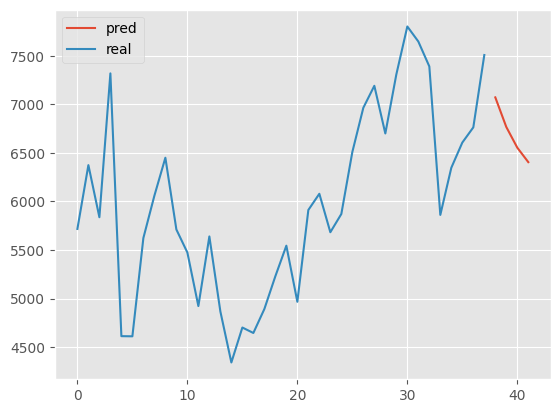

In [34]:
pred = pd.DataFrame({
    'pred': df_fit,
    'real': df[1]})
pred.plot();

In [35]:
train_df = df[:-4]
test_df = df[-4:]

In [36]:
model = ARIMA(train_df, order=(1,0,0))
model_fit = model.fit()

df_pred = model_fit.predict(34, 37)
df_pred

34    5873.051790
35    5880.710414
36    5885.787941
37    5889.154248
Name: predicted_mean, dtype: float64

In [37]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

calculate_mape(test_df[1], df_pred)

13.241435684901335